In [1]:
%load_ext autoreload
%autoreload 2

import os
from datetime import datetime
from time import time
# import dill
import pickle
import glob
import importlib
import numpy as np
import scipy as sp
import scipy.misc
import pandas as pd
import re
import itertools
from scanf import scanf
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation
import matplotlib.ticker as mtick
from matplotlib import colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm, PowerNorm, Normalize
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate, optimize, sparse
from scipy.interpolate import interp1d, interp2d
from IPython.display import display, HTML, Math
from scipy import interpolate
from tqdm.notebook import tqdm as tqdm_notebook

# from act_act_src import baseClass
from act_src import particleClass
from act_src import interactionClass
from act_src import problemClass
from act_src import relationClass
from act_codeStore.support_class import *
from act_codeStore import support_fun
from act_codeStore import support_fun as spf
from act_codeStore import support_fun_calculate as spc
from act_codeStore import support_fun_show as sps
from collectiveFish.do_calculate import *

PWD = os.getcwd()
np.set_printoptions(linewidth=110, precision=5)

params = {'animation.html': 'html5',
          'font.family':    'sans-serif',
          'font.size':      15, }
preamble = r' '
preamble = preamble + '\\usepackage{bm} '
preamble = preamble + '\\usepackage{amsmath} '
preamble = preamble + '\\usepackage{amssymb} '
preamble = preamble + '\\usepackage{mathrsfs} '
preamble = preamble + '\\DeclareMathOperator{\\Tr}{Tr} '
params['text.latex.preamble'] = preamble
params['text.usetex'] = True
plt.rcParams.update(params)

## test: finiteDipole2D class

### 2 finite dipoles

remove folder testFiniteDipole2D
make folder testFiniteDipole2D
 
Collective motion solve, Zhang Ji, 2021. 
 
Information about testFiniteDipole2D (finiteDipole2DProblem): 
  This is a 2 dimensional problem, contain 2 objects. 
  update function: 1fe, update order: (0, 0), max loop: -1
  t0=0.000000, t1=-1.000000, dt=-1.000000
  save log file to testFiniteDipole2D/log.testFiniteDipole2D 
  save pickle file to testFiniteDipole2D/pickle.testFiniteDipole2D 
  rotational noise: 0.000000, translational noise: 0.000000
 
Information about selfPropelled2D (selfPropelled2D): 
  None
 
Information about FiniteDipole2D (FiniteDipole2D): 
  None
 
Information about relation1 (finiteRelation2D): 
  overlap_epsilon=1.000000e-05
 
Solve, start time: 2022-05-05 15:57:44
 
Information about testFiniteDipole2D (finiteDipole2DProblem): 
  This is a 2 dimensional problem, contain 2 objects. 
  update function: 1fe, update order: (0, 0), max loop: 1000000000
  t0=0.000000, t1=20.000000, dt=0.100000
  save

  testFiniteDipole2D:   0%|          | 0/100 [00:00<?, ?it/s]

Solve, finish time: 2022-05-05 15:57:44
Solve, usage time: 0:00:00.233380
 
Pick HDF5 file: testFiniteDipole2D/hdf5.testFiniteDipole2D 
Empty problem hist: testFiniteDipole2D
Destroy problem: testFiniteDipole2D
Pick problem: testFiniteDipole2D/pickle.testFiniteDipole2D 


True

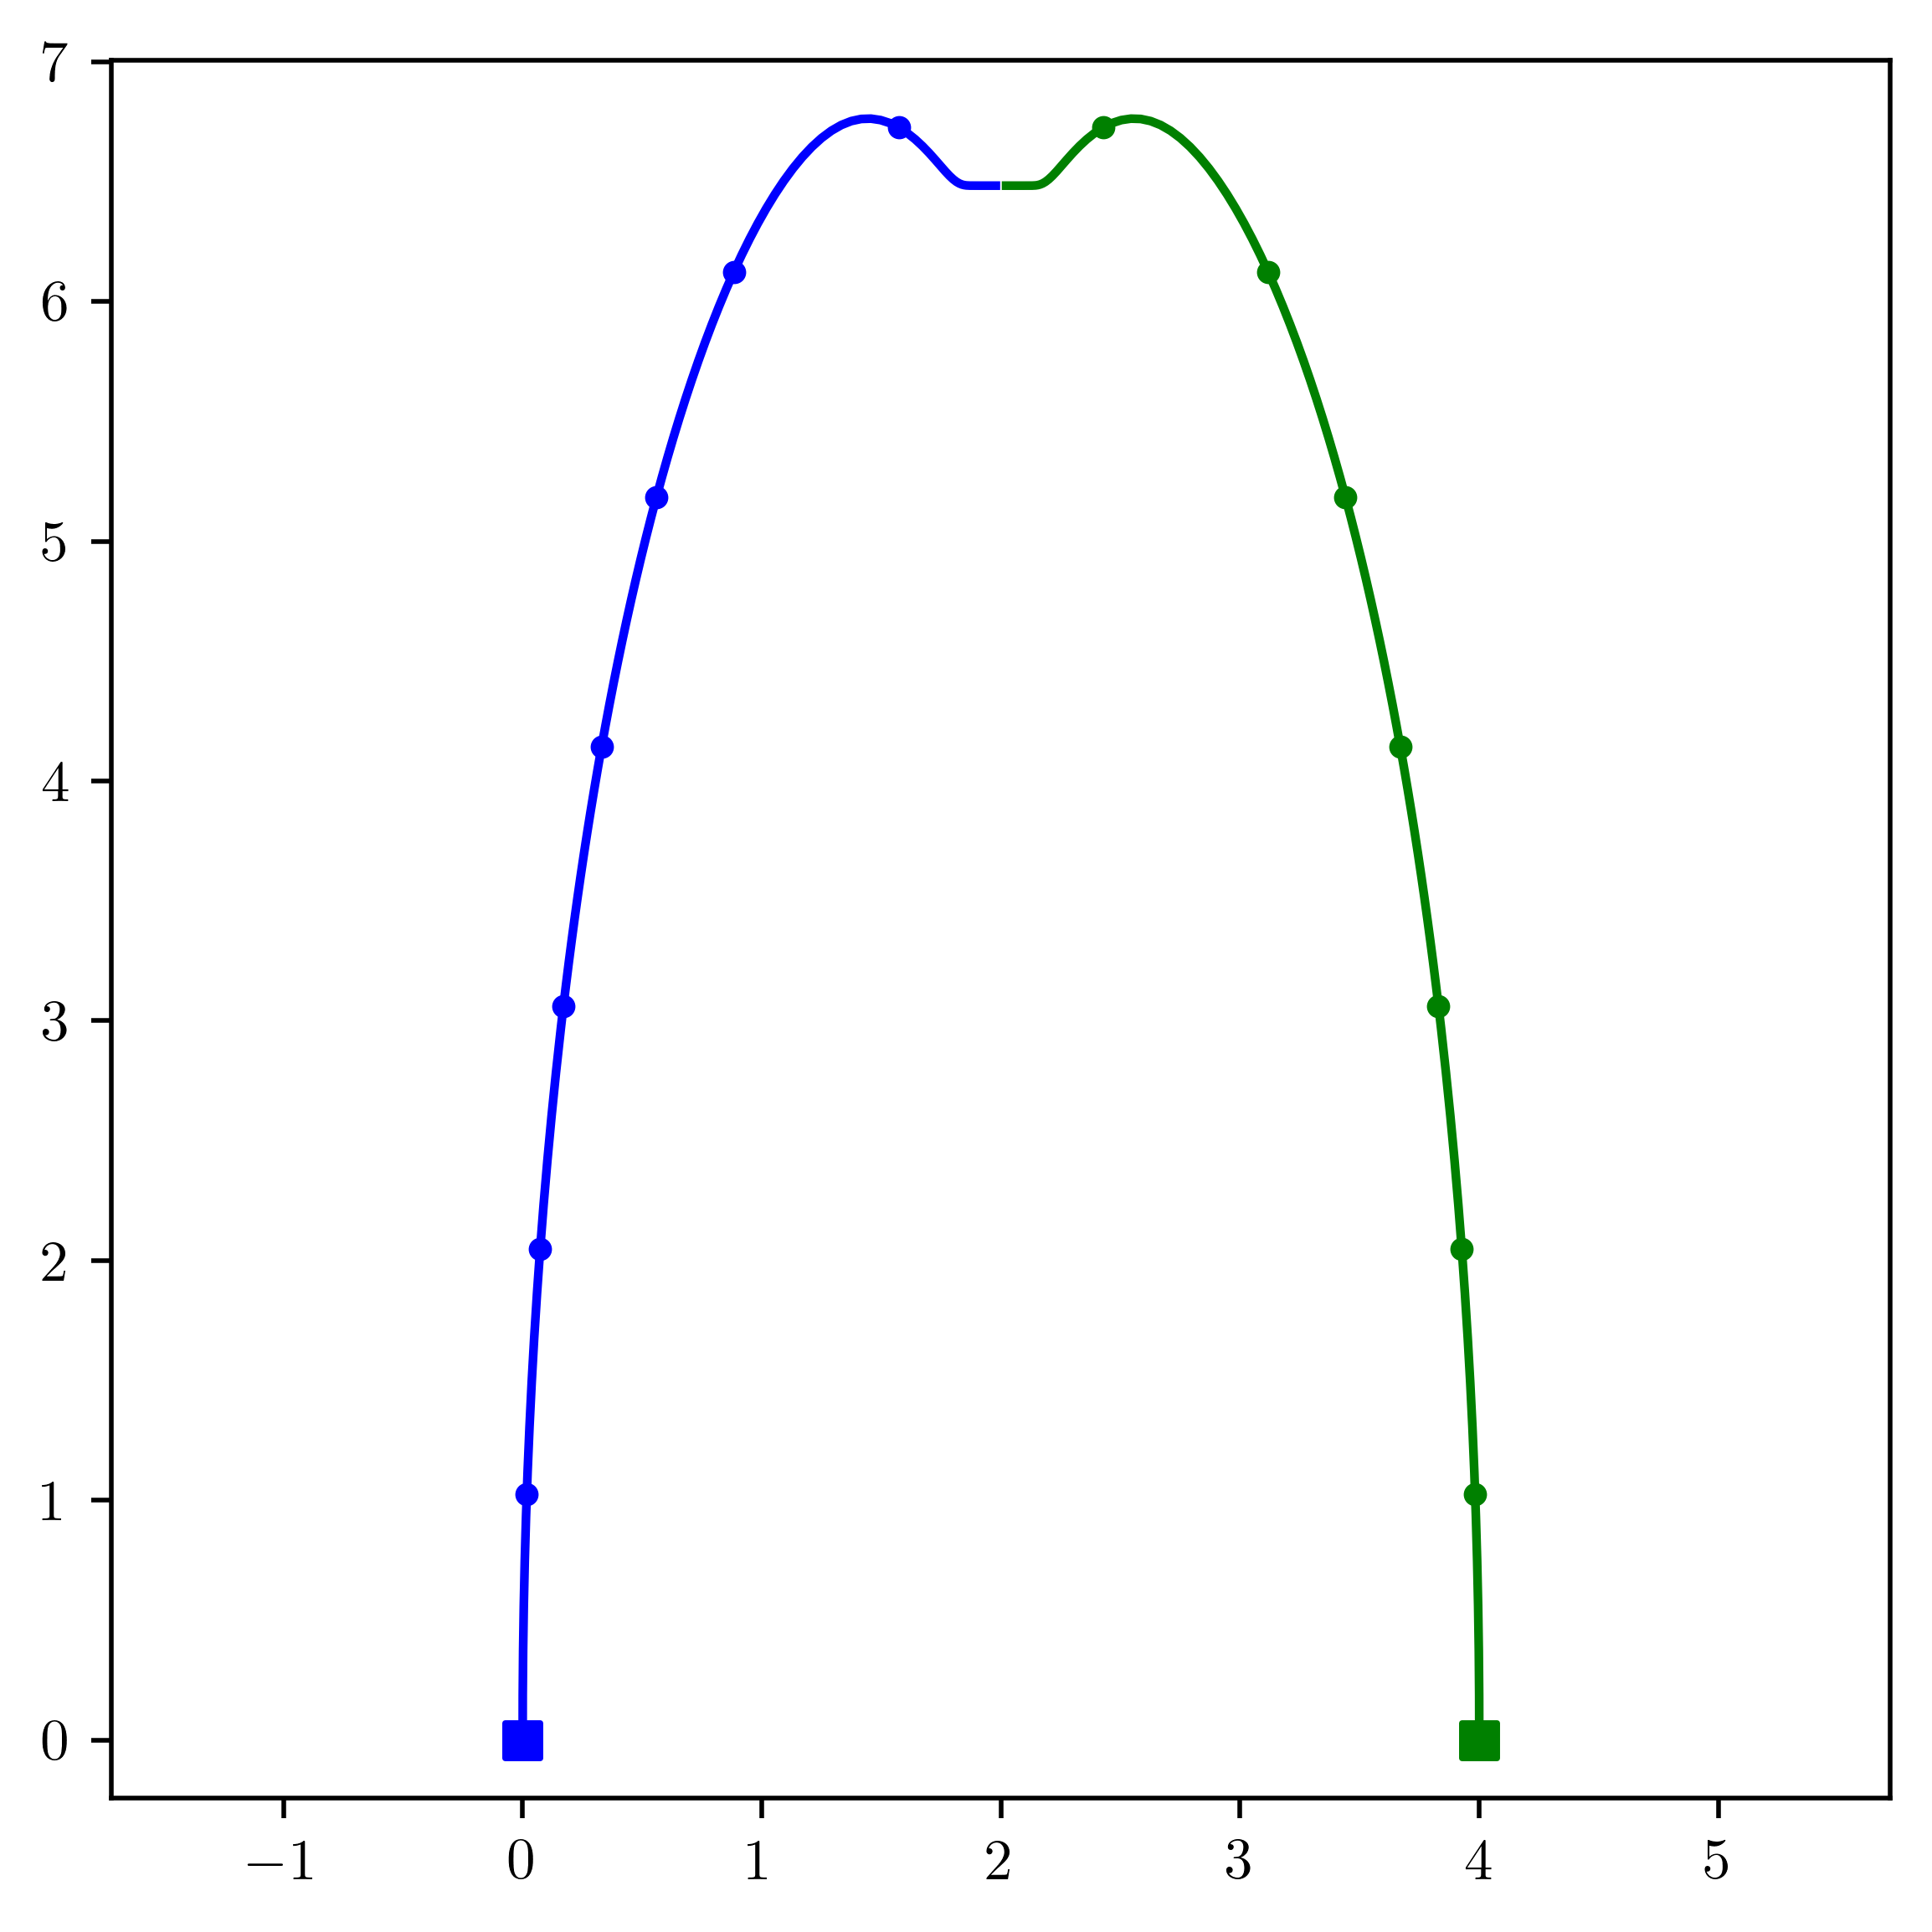

In [31]:
def ini_particle(name='...'):
    tptc = particleClass.finiteDipole2D(length=length, name='ptc2D')
    tptc.u = np.ones(1) * u
    prb1.add_obj(tptc)
    return tptc

# update_fun, update_order = '5bs', (1e-12, 1e-15)
update_fun, update_order, eval_dt = '1fe', (0, 0), 0.1
overlap_epsilon = 1e-5
u, length = 1, 1
attract, align = 0, 0
tmax = 20
# x, y, phi1, phi2 = 0, 4,    np.pi / 2, np.pi / 2   # Liebergen2015, Fig 4.1, case b
# x, y, phi1, phi2 = 2, 4,    np.pi / 2, np.pi / 2   # Liebergen2015, Fig 4.1, case c
# x, y, phi1, phi2 = 4, 2.25, np.pi / 2, np.pi / 2   # Liebergen2015, Fig 4.1, case d
# x, y, phi1, phi2 = 4, 1,    np.pi / 2, np.pi / 2   # Liebergen2015, Fig 4.1, case e
x, y, phi1, phi2 = 4, 0,    np.pi / 2, np.pi / 2   # Liebergen2015, Fig 4.1, case f

# y, x, phi1, phi2 = 0.5,        -8, np.pi, 0   # Liebergen2015, Fig 4.2, case b
# y, x, phi1, phi2 = 0.874,      -8, np.pi, 0   # Liebergen2015, Fig 4.2, case c
# y, x, phi1, phi2 = 0.875,      -8, np.pi, 0   # Liebergen2015, Fig 4.2, case d
# y, x, phi1, phi2 = 1,          -8, np.pi, 0   # Liebergen2015, Fig 4.2, case e
# y, x, phi1, phi2 = 0.87465, -8, np.pi, 0   # Liebergen2015, Fig 4.2, case f
# y, x, phi1, phi2 = 0.87465151, -8, np.pi, 0   # Liebergen2015, Fig 4.2, case f

# x, y, phi1, phi2 = 0.5,  1,    0, np.pi   # Liebergen2015, Fig 4.5, case a
# x, y, phi1, phi2 = 0,    1.15, 0, np.pi   # Liebergen2015, Fig 4.5, case b
# x, y, phi1, phi2 = 0.649, 0.7,  0, np.pi   # Liebergen2015, Fig 4.5, case c

# x, y, phi1, phi2 = -0.85,  0,    0, np.pi / 3       # Liebergen2015, Fig 4.8, case b
# x, y, phi1, phi2 =  0,    -0.9,  0, np.pi / 3       # Liebergen2015, Fig 4.8, case c
# x, y, phi1, phi2 = -0.3,  -1.15, 0, np.pi * 2 / 3   # Liebergen2015, Fig 4.8, case d
# x, y, phi1, phi2 = -0.75,  0,    0, np.pi * 2 / 3   # Liebergen2015, Fig 4.8, case e
# x, y, phi1, phi2 = -0.77,  0.4,  0, np.pi * 2 / 3   # Liebergen2015, Fig 4.8, case f

prb1 = problemClass.finiteDipole2DProblem(name='testFiniteDipole2D')
prb1.attract = attract
prb1.align = align
prb1.update_fun = update_fun
prb1.update_order = update_order

tptc1 = ini_particle(name='ptc2D')
tptc1.X = (0, 0)
tptc1.phi = np.ones(1)[0] * phi1
tptc2 = ini_particle(name='ptc2D')
# print(tptc1.phi, tptc1.P1)
# print(tptc2.phi, tptc2.P1)
tptc2.X = (x, y)
tptc2.phi = np.ones(1)[0] * phi2
# print(tptc2.phi, tptc2.P1)

rlt1 = relationClass.finiteRelation2D(name='relation1')
rlt1.overlap_epsilon = overlap_epsilon
prb1.relationHandle = rlt1

act1 = interactionClass.selfPropelled2D(name='selfPropelled2D')
prb1.add_act(act1)
act2 = interactionClass.FiniteDipole2D(name='FiniteDipole2D')
prb1.add_act(act2)

prb1.update_prepare()
prb1.update_self(t1=tmax, eval_dt=eval_dt)

################################################################################3

# %matplotlib notebook
%matplotlib inline

figsize=np.array((9, 9))*0.5
dpi = 500 if 'inline' in matplotlib.get_backend() else 100
plt_tmin = -1
nmarker = 0.1

fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
for obji, color in zip(prb1.obj_list, ('b', 'g')):
    tidx = prb1.t_hist >= plt_tmin
    X_hist = obji.X_hist[tidx]
    axi.scatter(X_hist[0, 0], X_hist[0, 1], c=color, marker='s')
    axi.plot(X_hist[:, 0], X_hist[:, 1], '.-', color=color, markevery=nmarker)
sps.set_axes_equal(axi)
do_hdf5(prb1, **prb1.kwargs)
prb1.hdf5_load(showInfo=False)

In [37]:
np.cos(np.pi / 2)

6.123233995736766e-17

In [35]:
tptc1.phi_hist

array([ 1.57080e+00,  1.57080e+00,  1.56746e+00,  1.56413e+00,  1.56079e+00,  1.55746e+00,  1.55411e+00,
        1.55076e+00,  1.54741e+00,  1.54404e+00,  1.54066e+00,  1.53727e+00,  1.53387e+00,  1.53044e+00,
        1.52700e+00,  1.52354e+00,  1.52006e+00,  1.51656e+00,  1.51302e+00,  1.50946e+00,  1.50587e+00,
        1.50225e+00,  1.49860e+00,  1.49490e+00,  1.49117e+00,  1.48740e+00,  1.48358e+00,  1.47971e+00,
        1.47579e+00,  1.47182e+00,  1.46779e+00,  1.46370e+00,  1.45955e+00,  1.45533e+00,  1.45104e+00,
        1.44667e+00,  1.44221e+00,  1.43768e+00,  1.43305e+00,  1.42832e+00,  1.42349e+00,  1.41855e+00,
        1.41349e+00,  1.40831e+00,  1.40300e+00,  1.39754e+00,  1.39193e+00,  1.38616e+00,  1.38022e+00,
        1.37409e+00,  1.36776e+00,  1.36122e+00,  1.35444e+00,  1.34742e+00,  1.34013e+00,  1.33254e+00,
        1.32464e+00,  1.31640e+00,  1.30779e+00,  1.29877e+00,  1.28930e+00,  1.27934e+00,  1.26885e+00,
        1.25776e+00,  1.24601e+00,  1.23354e+00,  1.220

dbg, resampling_fct of current method is prohibit. 
plt_range is 10


  0%|          | 0/52 [00:00<?, ?it/s]

Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1150x900 -pix_fmt rgba -r 5 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -vcodec libx264 -y /home/zhangji/Documents/animation/testFiniteDipole2D_73997564.avi


/home/zhangji/Documents/animation/testFiniteDipole2D_73997564.avi


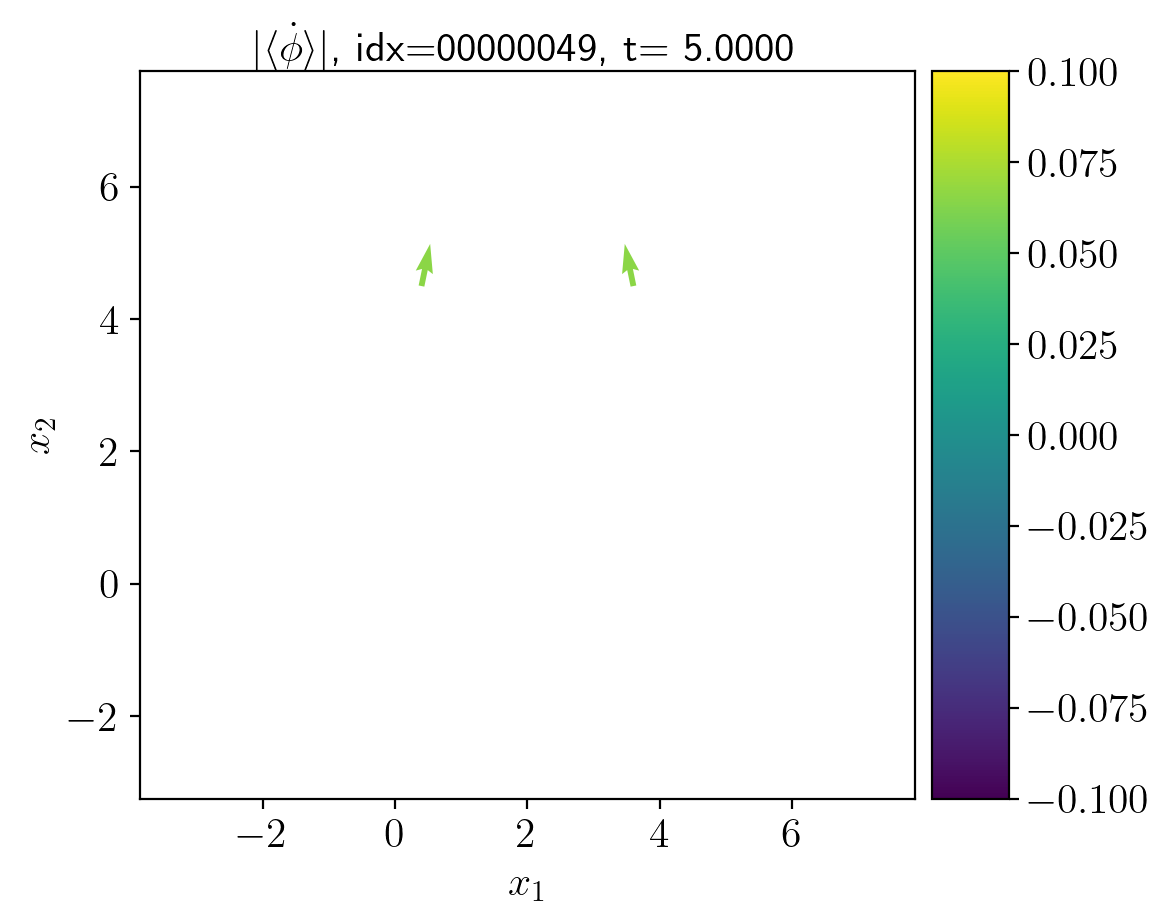

In [76]:
#------------------------------------------------------------------------------------------
anim_base_path = '/home/zhangji/Documents'
figsize = np.array((11, 9)) * 0.5
dpi = 200
resampling_fct, interp1d_kind = None, 'linear'
plt_tmin, plt_tmax, tavr, stp, plt_range, fps = -np.inf, 5, 0.001, 1, 10, 5
vmin, vmax = 0, prb1.align
# vmin, vmax = -prb1.align, prb1.align
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.get_cmap('viridis')

anim = sps.make2D_Xphiomega_video(prb1, figsize=figsize, dpi=dpi, plt_tmin=plt_tmin, plt_tmax=plt_tmax, 
                               stp=stp, resampling_fct=resampling_fct, interp1d_kind=interp1d_kind, 
                               vmin=None, vmax=None, norm=norm, cmap=cmap, tavr=tavr, plt_range=plt_range)
anim_name = '%s_%s.avi' % (prb1.name, ('%d' % (time() * 1e2))[-8:])
anim_path = os.path.join(anim_base_path, 'animation', anim_name)
print(anim_path)
# save_s = '%dx%d' % (figsize[0] * 640, figsize[1] * 640)
# FFwriter = animation.FFMpegWriter(fps=fps, extra_args=['-vcodec', 'libx264', '-s', save_s])
FFwriter = animation.FFMpegWriter(fps=fps, extra_args=['-vcodec', 'libx264',])
anim.save(anim_path, writer=FFwriter)

### 3 finite dipoles

  0%|          | 0/100 [00:00<?, ?it/s]

<AxesSubplot:>

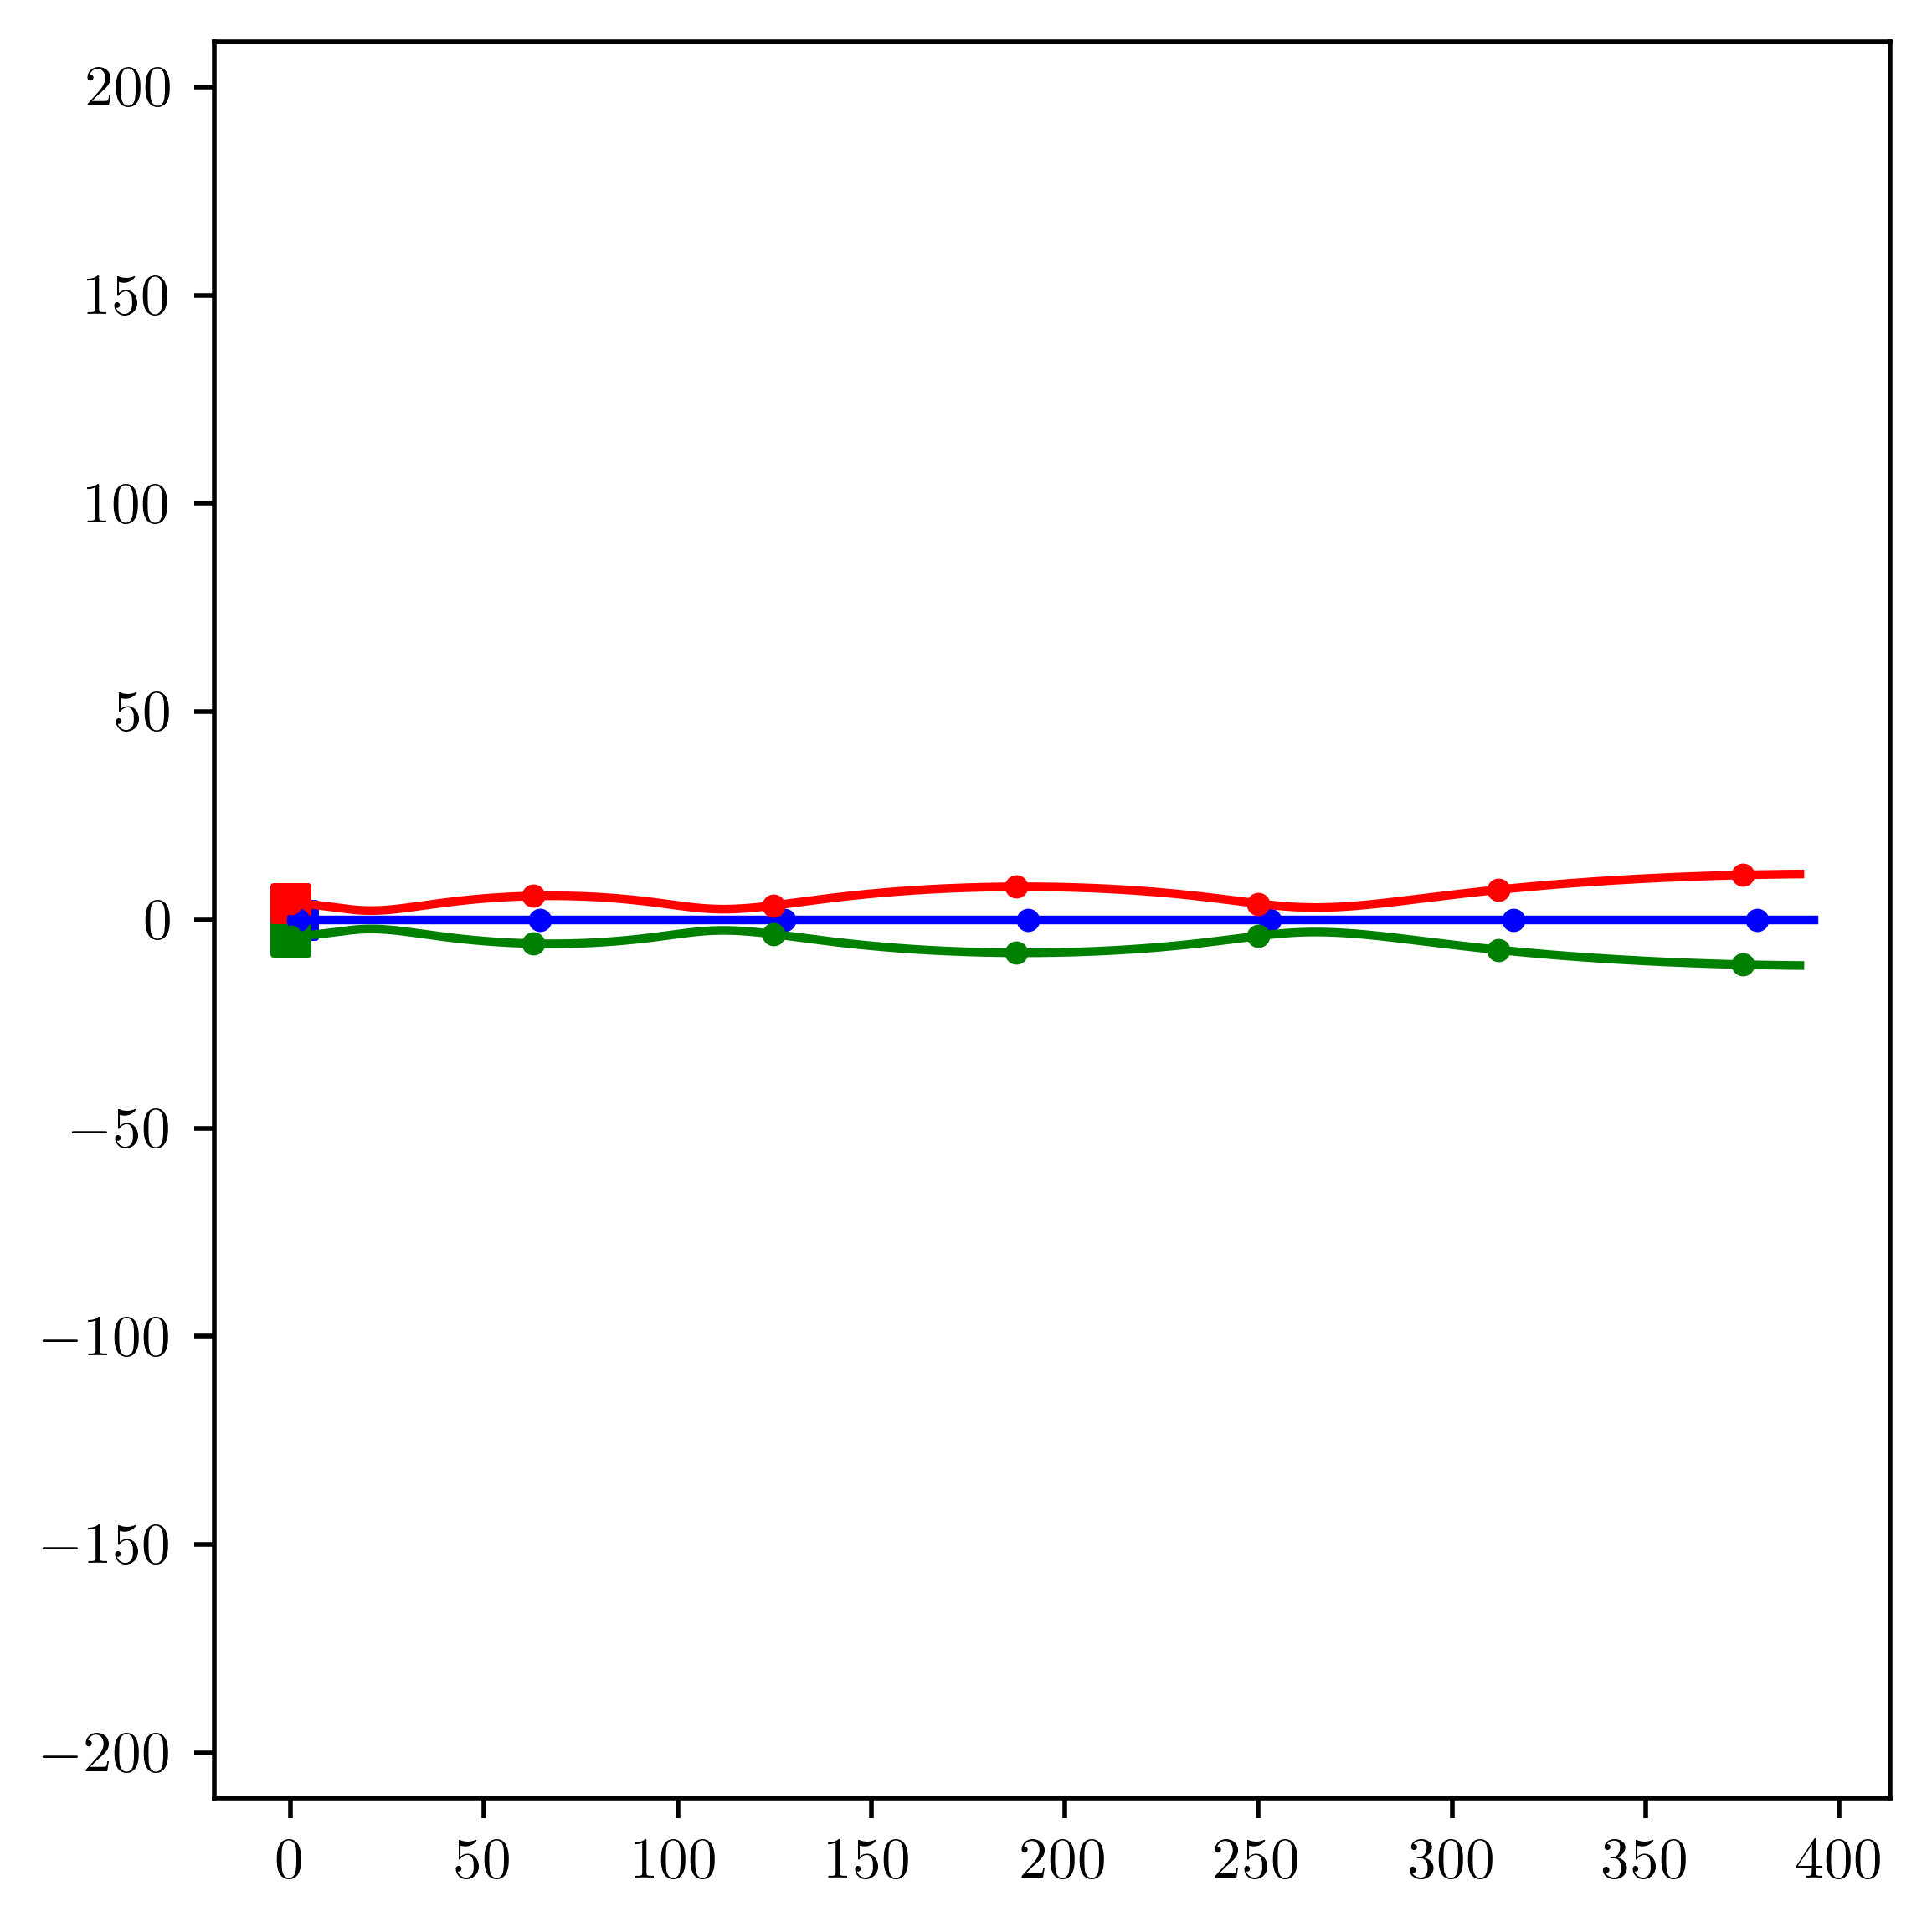

In [22]:
def ini_particle(name='...'):
    tptc = particleClass.finiteDipole2D(length=length, name='ptc2D')
    tptc1.phi = 0
    tptc.u = u
    prb1.add_obj(tptc)
    return tptc

update_fun, update_order = '5bs', (1e-12, 1e-15)
overlap_epsilon = 1e-5
u, length = 1, 1
attract, align = 0, 0
tmax = 400

# H0, X0 = 4, 0,   # Liebergen2015, Fig 5.1, case b
# H0, X0 = 3, 1,   # Liebergen2015, Fig 5.1, case c
H0, X0 = 4, 2,   # Liebergen2015, Fig 5.1, case d

prb1 = problemClass.finiteDipole2DProblem(name='testFiniteDipole2D')
prb1.attract = attract
prb1.align = align
prb1.update_fun = update_fun
prb1.update_order = update_order

tptc1 = ini_particle(name='ptc2D')
tptc1.X = (X0, 0)
tptc2 = ini_particle(name='ptc2D')
tptc2.X = (0, -H0)
tptc3 = ini_particle(name='ptc2D')
tptc3.X = (0, H0)

rlt1 = relationClass.relation2D(name='relation1')
rlt1.overlap_epsilon = overlap_epsilon
prb1.relationHandle = rlt1

act1 = interactionClass.selfPropelled2D(name='selfPropelled2D')
prb1.add_act(act1)
act2 = interactionClass.FiniteDipole2D(name='FiniteDipole2D')
prb1.add_act(act2)

prb1.update_prepare()
prb1.update_self(t1=tmax)

################################################################################3

# %matplotlib notebook
%matplotlib inline

figsize=np.array((9, 9))*0.5
dpi = 500 if 'inline' in matplotlib.get_backend() else 100
plt_tmin = -1
nmarker = 0.1

fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
for obji, color in zip(prb1.obj_list, ('b', 'g', 'r')):
    tidx = prb1.t_hist >= plt_tmin
    X_hist = obji.X_hist[tidx]
    axi.scatter(X_hist[0, 0], X_hist[0, 1], c=color, marker='s')
    axi.plot(X_hist[:, 0], X_hist[:, 1], '.-', color=color, markevery=nmarker)
support_fun.set_axes_equal(axi)


## test the voronoi diagram

[[0, 1],
 [1, 3, 4],
 [2, 3],
 [0, 9, 11],
 [4, 7, 10, 11],
 [2, 8, 10],
 [6, 9],
 [5, 6, 7],
 [5, 8]]

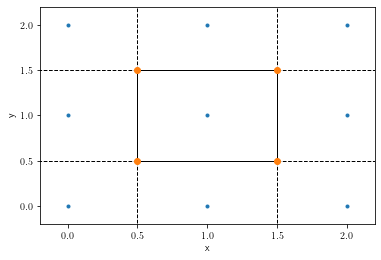

In [134]:
from scipy.spatial import Voronoi, voronoi_plot_2d

points = np.array([[0, 0], [0, 1], [0, 2], 
                   [1, 0], [1, 1], [1, 2],
                   [2, 0], [2, 1], [2, 2]])

# points = np.array([[0, 0], [1, 0], [2, 0], 
#                    [0, 1], [1, 1], [2, 1],
#                    [0, 2], [1, 2], [2, 2]])

# points = np.random.sample((10, 2)) * 10

vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
axi = fig.gca()
axi.set_xlabel('x')
axi.set_ylabel('y')

X2ridge = [[] for _ in vor.points]
for idx_ridge, (X0, X1) in enumerate(vor.ridge_points):
    X2ridge[X0].append(idx_ridge)
    X2ridge[X1].append(idx_ridge)
X2ridge

In [130]:
print(vor.points)
print()
print(vor.vertices)
# print()
# print(vor.ridge_points)
# print()
# print(vor.ridge_vertices)
# print()
# print(vor.regions)
# print()
# print(vor.point_region)
# print()
# print([vor.regions[i0] for i0 in vor.point_region])


[[0. 0.]
 [0. 1.]
 [0. 2.]
 [1. 0.]
 [1. 1.]
 [1. 2.]
 [2. 0.]
 [2. 1.]
 [2. 2.]]

[[0.5 0.5]
 [0.5 1.5]
 [1.5 0.5]
 [1.5 1.5]]


In [93]:
# print(vor.regions)

# for i0, treg in enumerate(vor.regions):
#     print(i0, treg)

for i0, (tpoint, tvertice) in enumerate(zip(vor.ridge_points, vor.ridge_vertices)):
    print('%2d' % i0, tpoint, tvertice)

# for i0, (tpoint, tvertice) in enumerate(zip(vor.ridge_points, vor.ridge_vertices)):
#     print('%2d' % i0, 
#           vor.points[tpoint[0]], vor.points[tpoint[1]], 
#           vor.vertices[tvertice[0]], vor.vertices[tvertice[1]])

 0 [0 3] [-1, 0]
 1 [0 1] [-1, 0]
 2 [2 5] [-1, 1]
 3 [2 1] [-1, 1]
 4 [1 4] [0, 1]
 5 [7 8] [-1, 3]
 6 [7 6] [-1, 2]
 7 [7 4] [2, 3]
 8 [8 5] [-1, 3]
 9 [6 3] [-1, 2]
10 [4 5] [1, 3]
11 [4 3] [0, 2]


In [88]:
vor.point_region

array([ 5,  1, 10,  3, 12,  7,  2,  9,  6,  4, 11,  8])

In [89]:
vor.regions

[[],
 [1, -1, 0],
 [3, -1, 2],
 [3, -1, 0],
 [-1, 2],
 [-1, 0],
 [5, -1, 4],
 [5, -1, 1],
 [-1, 4],
 [5, 3, 2, 4],
 [-1, 1],
 [4, -1, 2],
 [5, 1, 0, 3]]

## test, collective fish

  0%|          | 0/100 [00:00<?, ?it/s]

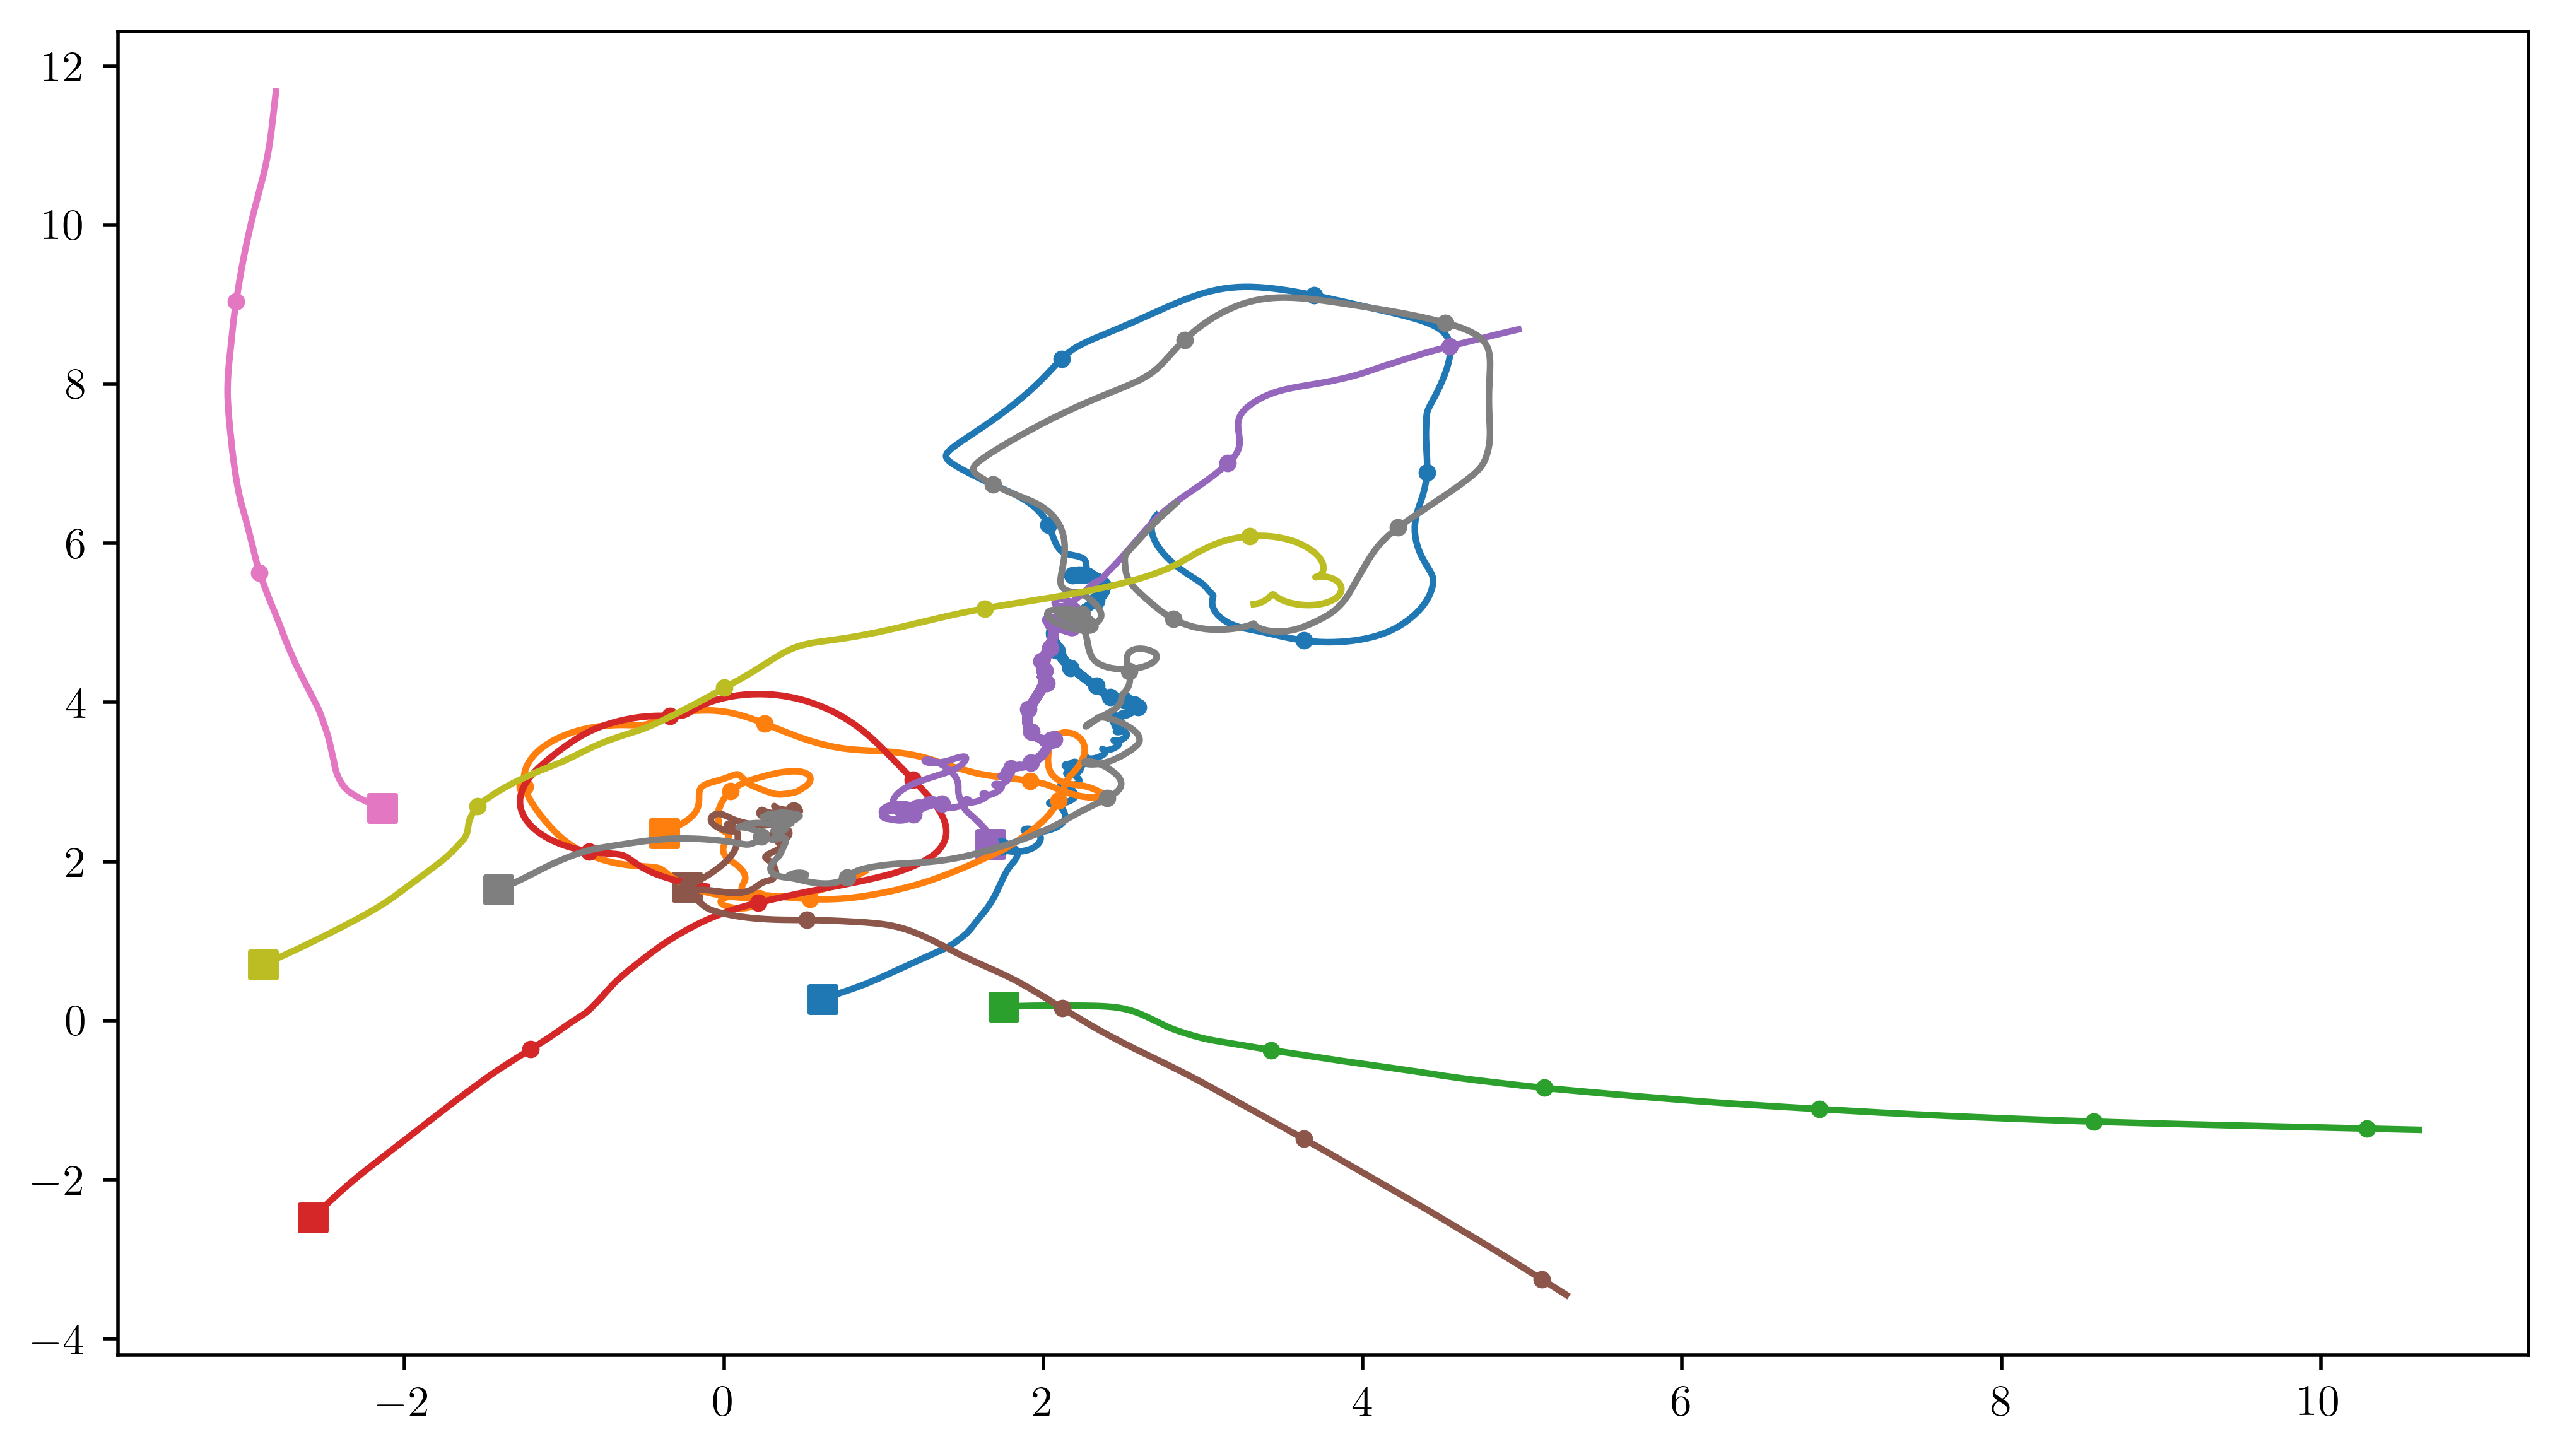

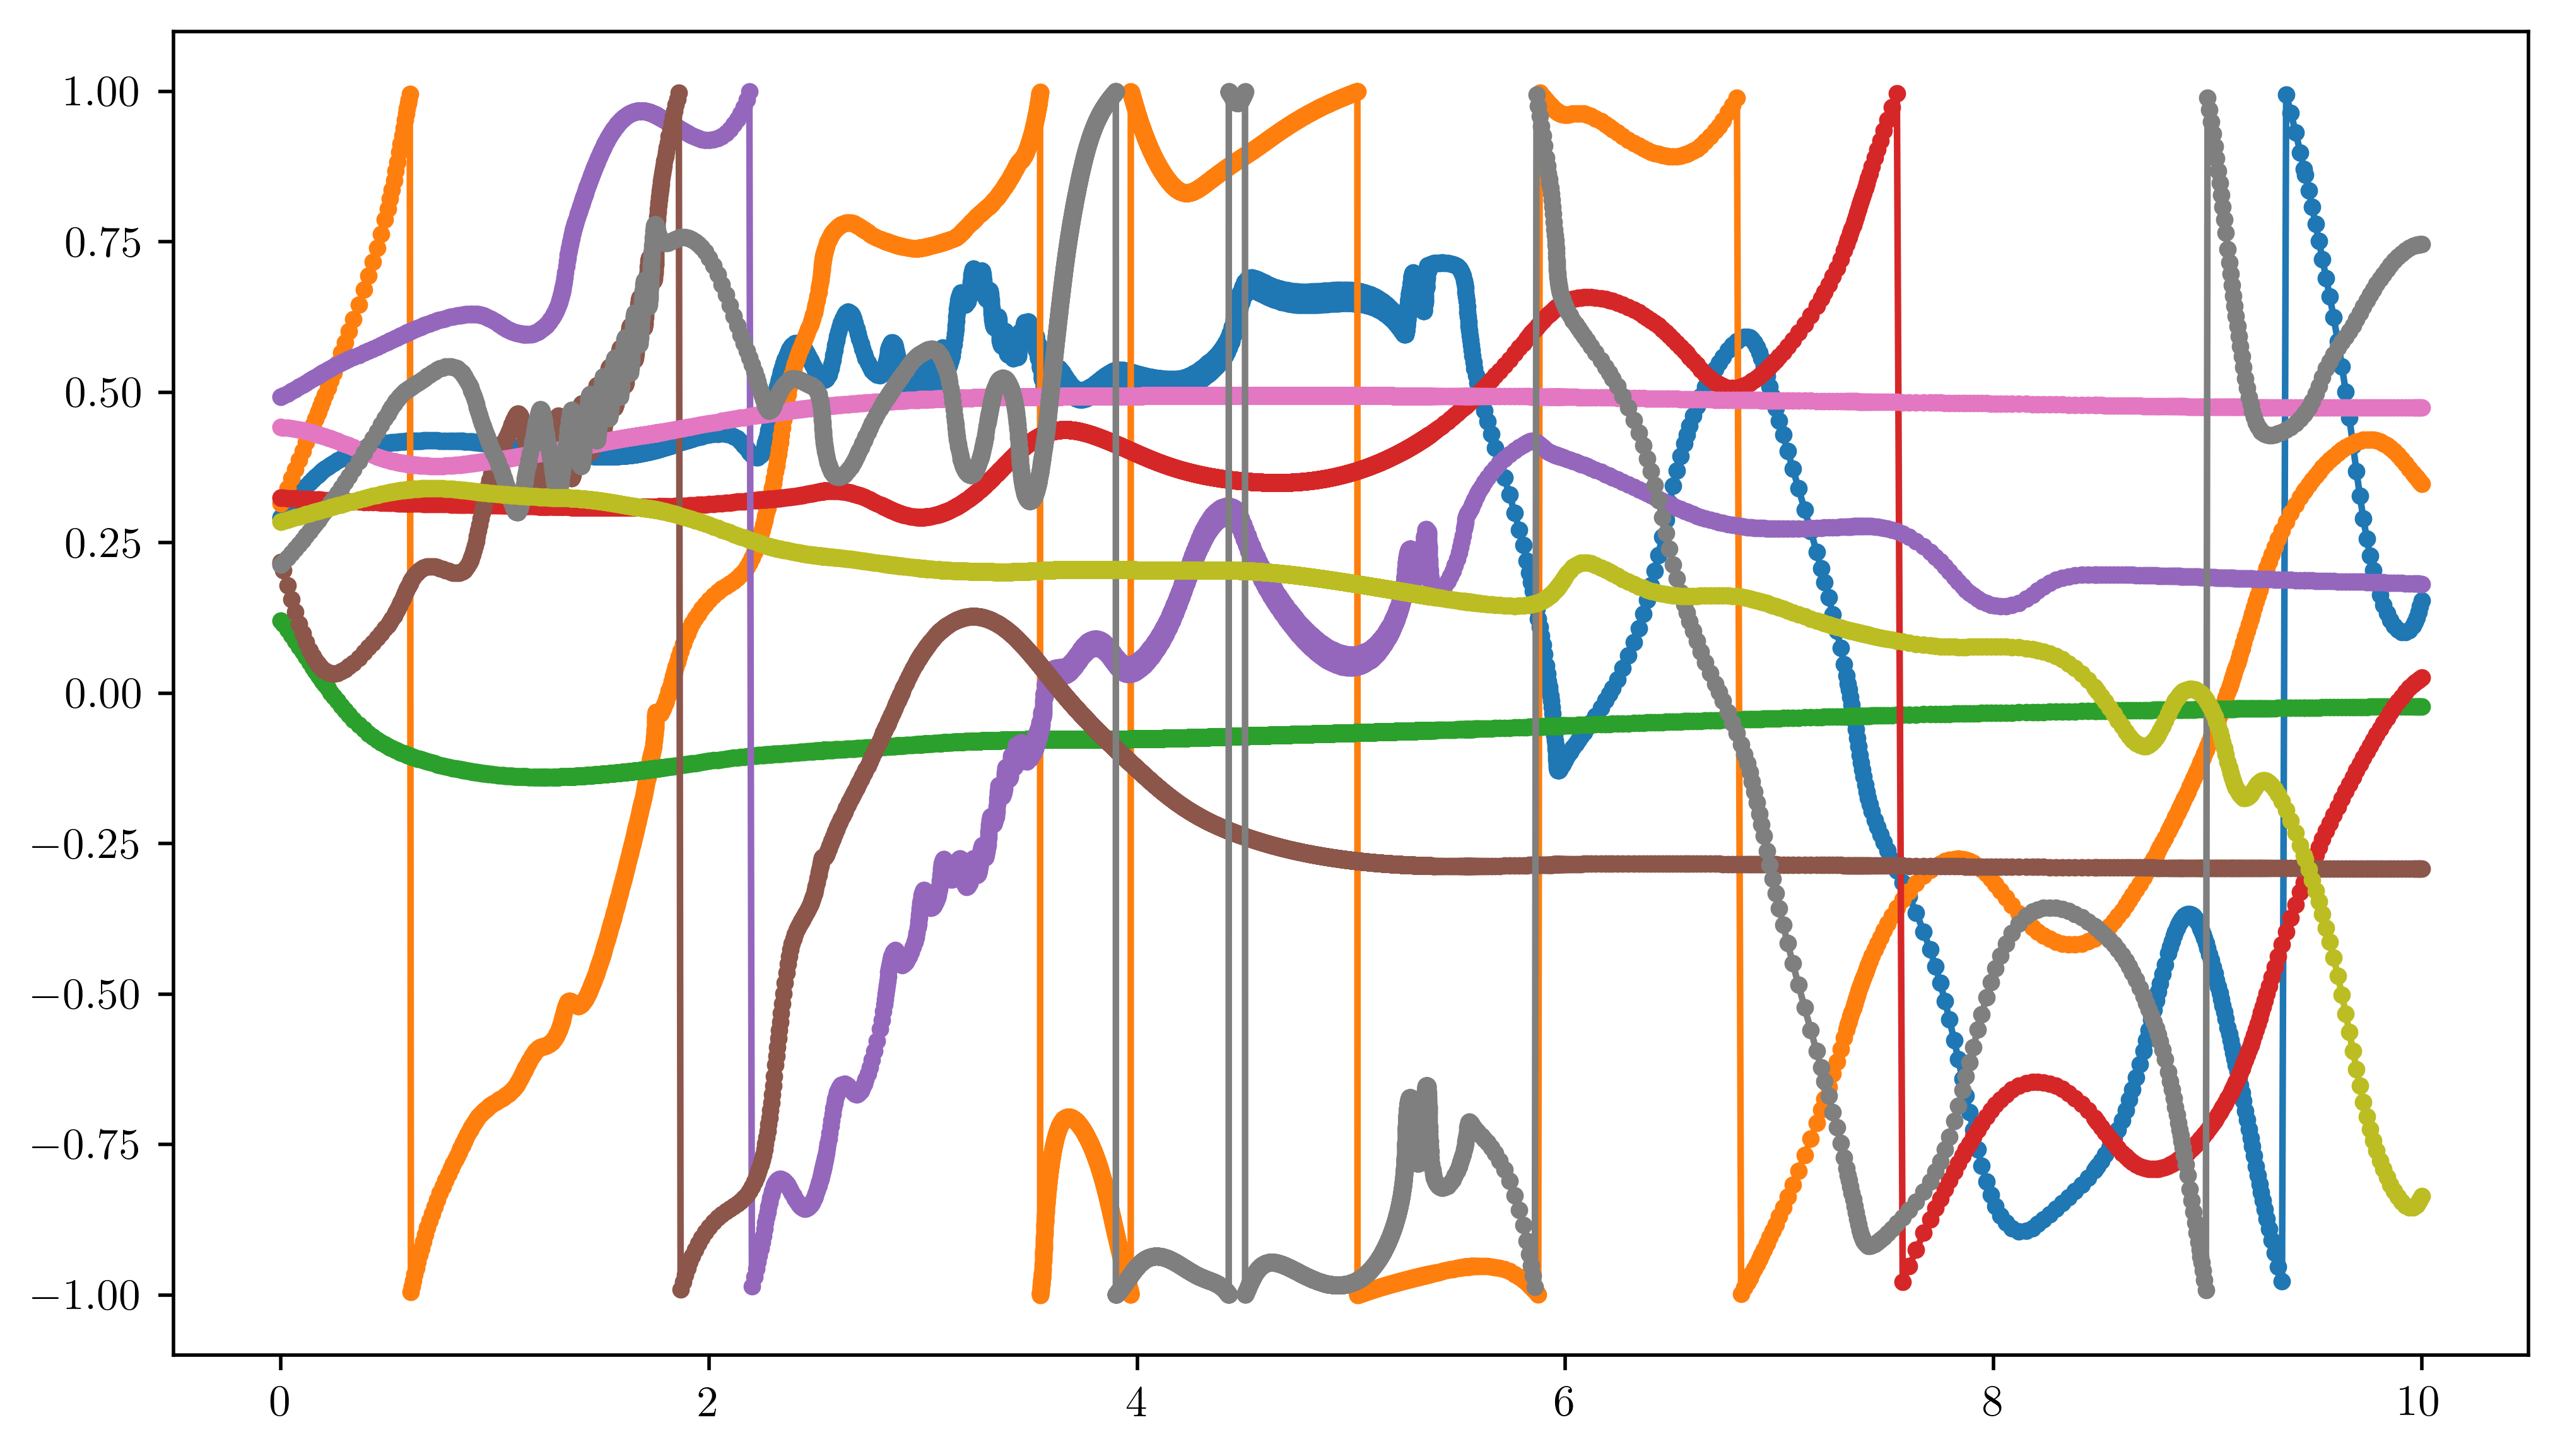

In [35]:
update_fun, update_order = '5bs', (1e-9, 1e-12)
test_n = 10
overlap_epsilon = 1e-2
u, length = 1, 1
attract, align = 1, 1
tmax = 10

prb1 = problemClass.finiteDipole2DProblem(name='testFiniteDipole2D')
prb1.attract = attract
prb1.align = align
prb1.update_fun = update_fun
prb1.update_order = update_order

np.random.seed(0)
for _ in range(test_n):
    tptc = particleClass.finiteDipole2D(length=length, name='ptc2D')
    tptc.P1 = np.random.sample((2,))
    tptc.X = np.random.uniform(-3, 3, (2,))
    tptc.u = u
    prb1.add_obj(tptc)

rlt1 = relationClass.VoronoiRelation2D(name='relation1')
rlt1.overlap_epsilon = overlap_epsilon
prb1.relationHandle = rlt1

act1 = interactionClass.selfPropelled2D(name='selfPropelled2D')
prb1.add_act(act1)
act2 = interactionClass.FiniteDipole2D(name='FiniteDipole2D')
prb1.add_act(act2)
# act3 = interactionClass.Attract2D(name='Attract2D')
# prb1.add_act(act3)
# act4 = interactionClass.Align2D(name='Align2D')
# prb1.add_act(act4)

prb1.update_prepare()
prb1.update_self(t1=tmax)


################################################################################3

# %matplotlib notebook
%matplotlib inline

figsize = np.array((16, 9))*0.5
dpi = 500 if 'inline' in matplotlib.get_backend() else 100
plt_tmin = -1
nmarker = 0.1

fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
for obji, i0 in zip(prb1.obj_list, range(9)):
    color = 'C%d' % i0
    tidx = prb1.t_hist >= plt_tmin
    X_hist = obji.X_hist[tidx]
    axi.scatter(X_hist[0, 0], X_hist[0, 1], c=color, marker='s')
    axi.plot(X_hist[:, 0], X_hist[:, 1], '.-', color=color, markevery=nmarker)
# support_fun.set_axes_equal(axi)

fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
for obji, i0 in zip(prb1.obj_list, range(9)):
    color = 'C%d' % i0
    axi.plot(prb1.t_hist, obji.phi_hist / np.pi, '.-', color=color)


  0%|          | 0/6879 [00:00<?, ?it/s]

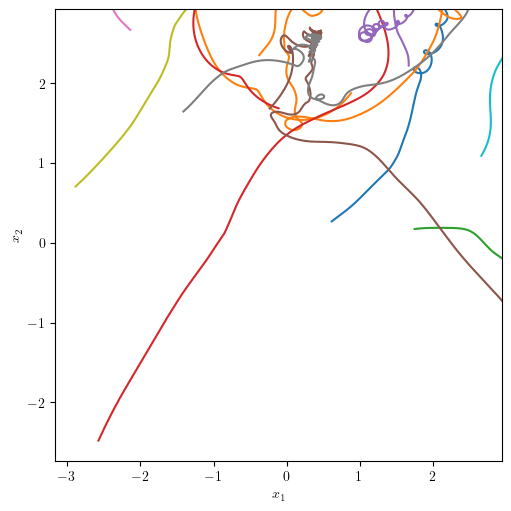

In [36]:
from act_codeStore import support_fun_animation as spanm
from IPython import display

figsize = np.array((5, 5))

anim = spanm.make2D_X_video(prb1.t_hist, prb1.obj_list, figsize=figsize, resampling_fct=1)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

In [40]:
np.random.seed(0)
np.random.sample(1)

array([0.54881])

## do_FiniteDipole2D

In [1]:
%load_ext autoreload
%autoreload 2

import os
from datetime import datetime
from time import time
# import dill
import pickle
import glob
import importlib
import numpy as np
import scipy as sp
import scipy.misc
import pandas as pd
import re
import itertools
from scanf import scanf
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm, PowerNorm, Normalize
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate, optimize, sparse
from scipy.interpolate import interp1d, interp2d
from IPython.display import display, HTML, Math
from scipy import interpolate
from tqdm.notebook import tqdm as tqdm_notebook

# from act_act_src import baseClass
from act_src import particleClass
from act_src import interactionClass
from act_src import problemClass
from act_src import relationClass
from act_codeStore.support_class import *
from act_codeStore import support_fun
from act_codeStore import support_fun_calculate as spc

PWD = os.getcwd()
np.set_printoptions(linewidth=110, precision=5)

params = {'animation.html': 'html5',
          'font.family':    'sans-serif',
          'font.size':      15, }
preamble = r' '
preamble = preamble + '\\usepackage{bm} '
preamble = preamble + '\\usepackage{amsmath} '
preamble = preamble + '\\usepackage{amssymb} '
preamble = preamble + '\\usepackage{mathrsfs} '
preamble = preamble + '\\DeclareMathOperator{\\Tr}{Tr} '
params['text.latex.preamble'] = preamble
params['text.usetex'] = True
plt.rcParams.update(params)


calculate_fun_dict = {
    'do_FiniteDipole2D':       spc.do_FiniteDipole2D,
    'do_LimFiniteDipole2D':    spc.do_LimFiniteDipole2D,
    'do_actLimFiniteDipole2D': spc.do_actLimFiniteDipole2D,
}
prbHandle_dict = {
    'do_FiniteDipole2D':       problemClass.finiteDipole2DProblem,
    'do_LimFiniteDipole2D':    problemClass.limFiniteDipole2DProblem,
    'do_actLimFiniteDipole2D': problemClass.actLimFiniteDipole2DProblem,
}
rltHandle_dict = {
    'do_FiniteDipole2D':       relationClass.finiteRelation2D,
    'do_LimFiniteDipole2D':    relationClass.limFiniteRelation2D,
    'do_actLimFiniteDipole2D': relationClass.VoronoiRelation2D,
}
ptcHandle_dict = {
    'do_FiniteDipole2D':       particleClass.finiteDipole2D,
    'do_LimFiniteDipole2D':    particleClass.limFiniteDipole2D,
    'do_actLimFiniteDipole2D': particleClass.limFiniteDipole2D,
}

{'ini_t': 0, 'max_t': 3, 'update_fun': '5bs', 'update_order': (0.001, 1e-05), 'eval_dt': 0.1, 'calculate_fun': <class 'act_codeStore.support_fun_calculate.do_LimFiniteDipole2D'>, 'prbHandle': <class 'act_src.problemClass.limFiniteDipole2DProblem'>, 'rltHandle': <class 'act_src.relationClass.limFiniteRelation2D'>, 'ptcHandle': <class 'act_src.particleClass.limFiniteDipole2D'>, 'fileHandle': '', 'save_every': 1, 'nptc': 5, 'overlap_epsilon': 0.01, 'un': 1, 'ln': 1, 'Xlim': 1, 'attract': 1, 'align': 1, 'seed': 0, 'tqdm_fun': <class 'tqdm.notebook.tqdm_notebook'>}


  0%|          | 0/100 [00:00<?, ?it/s]

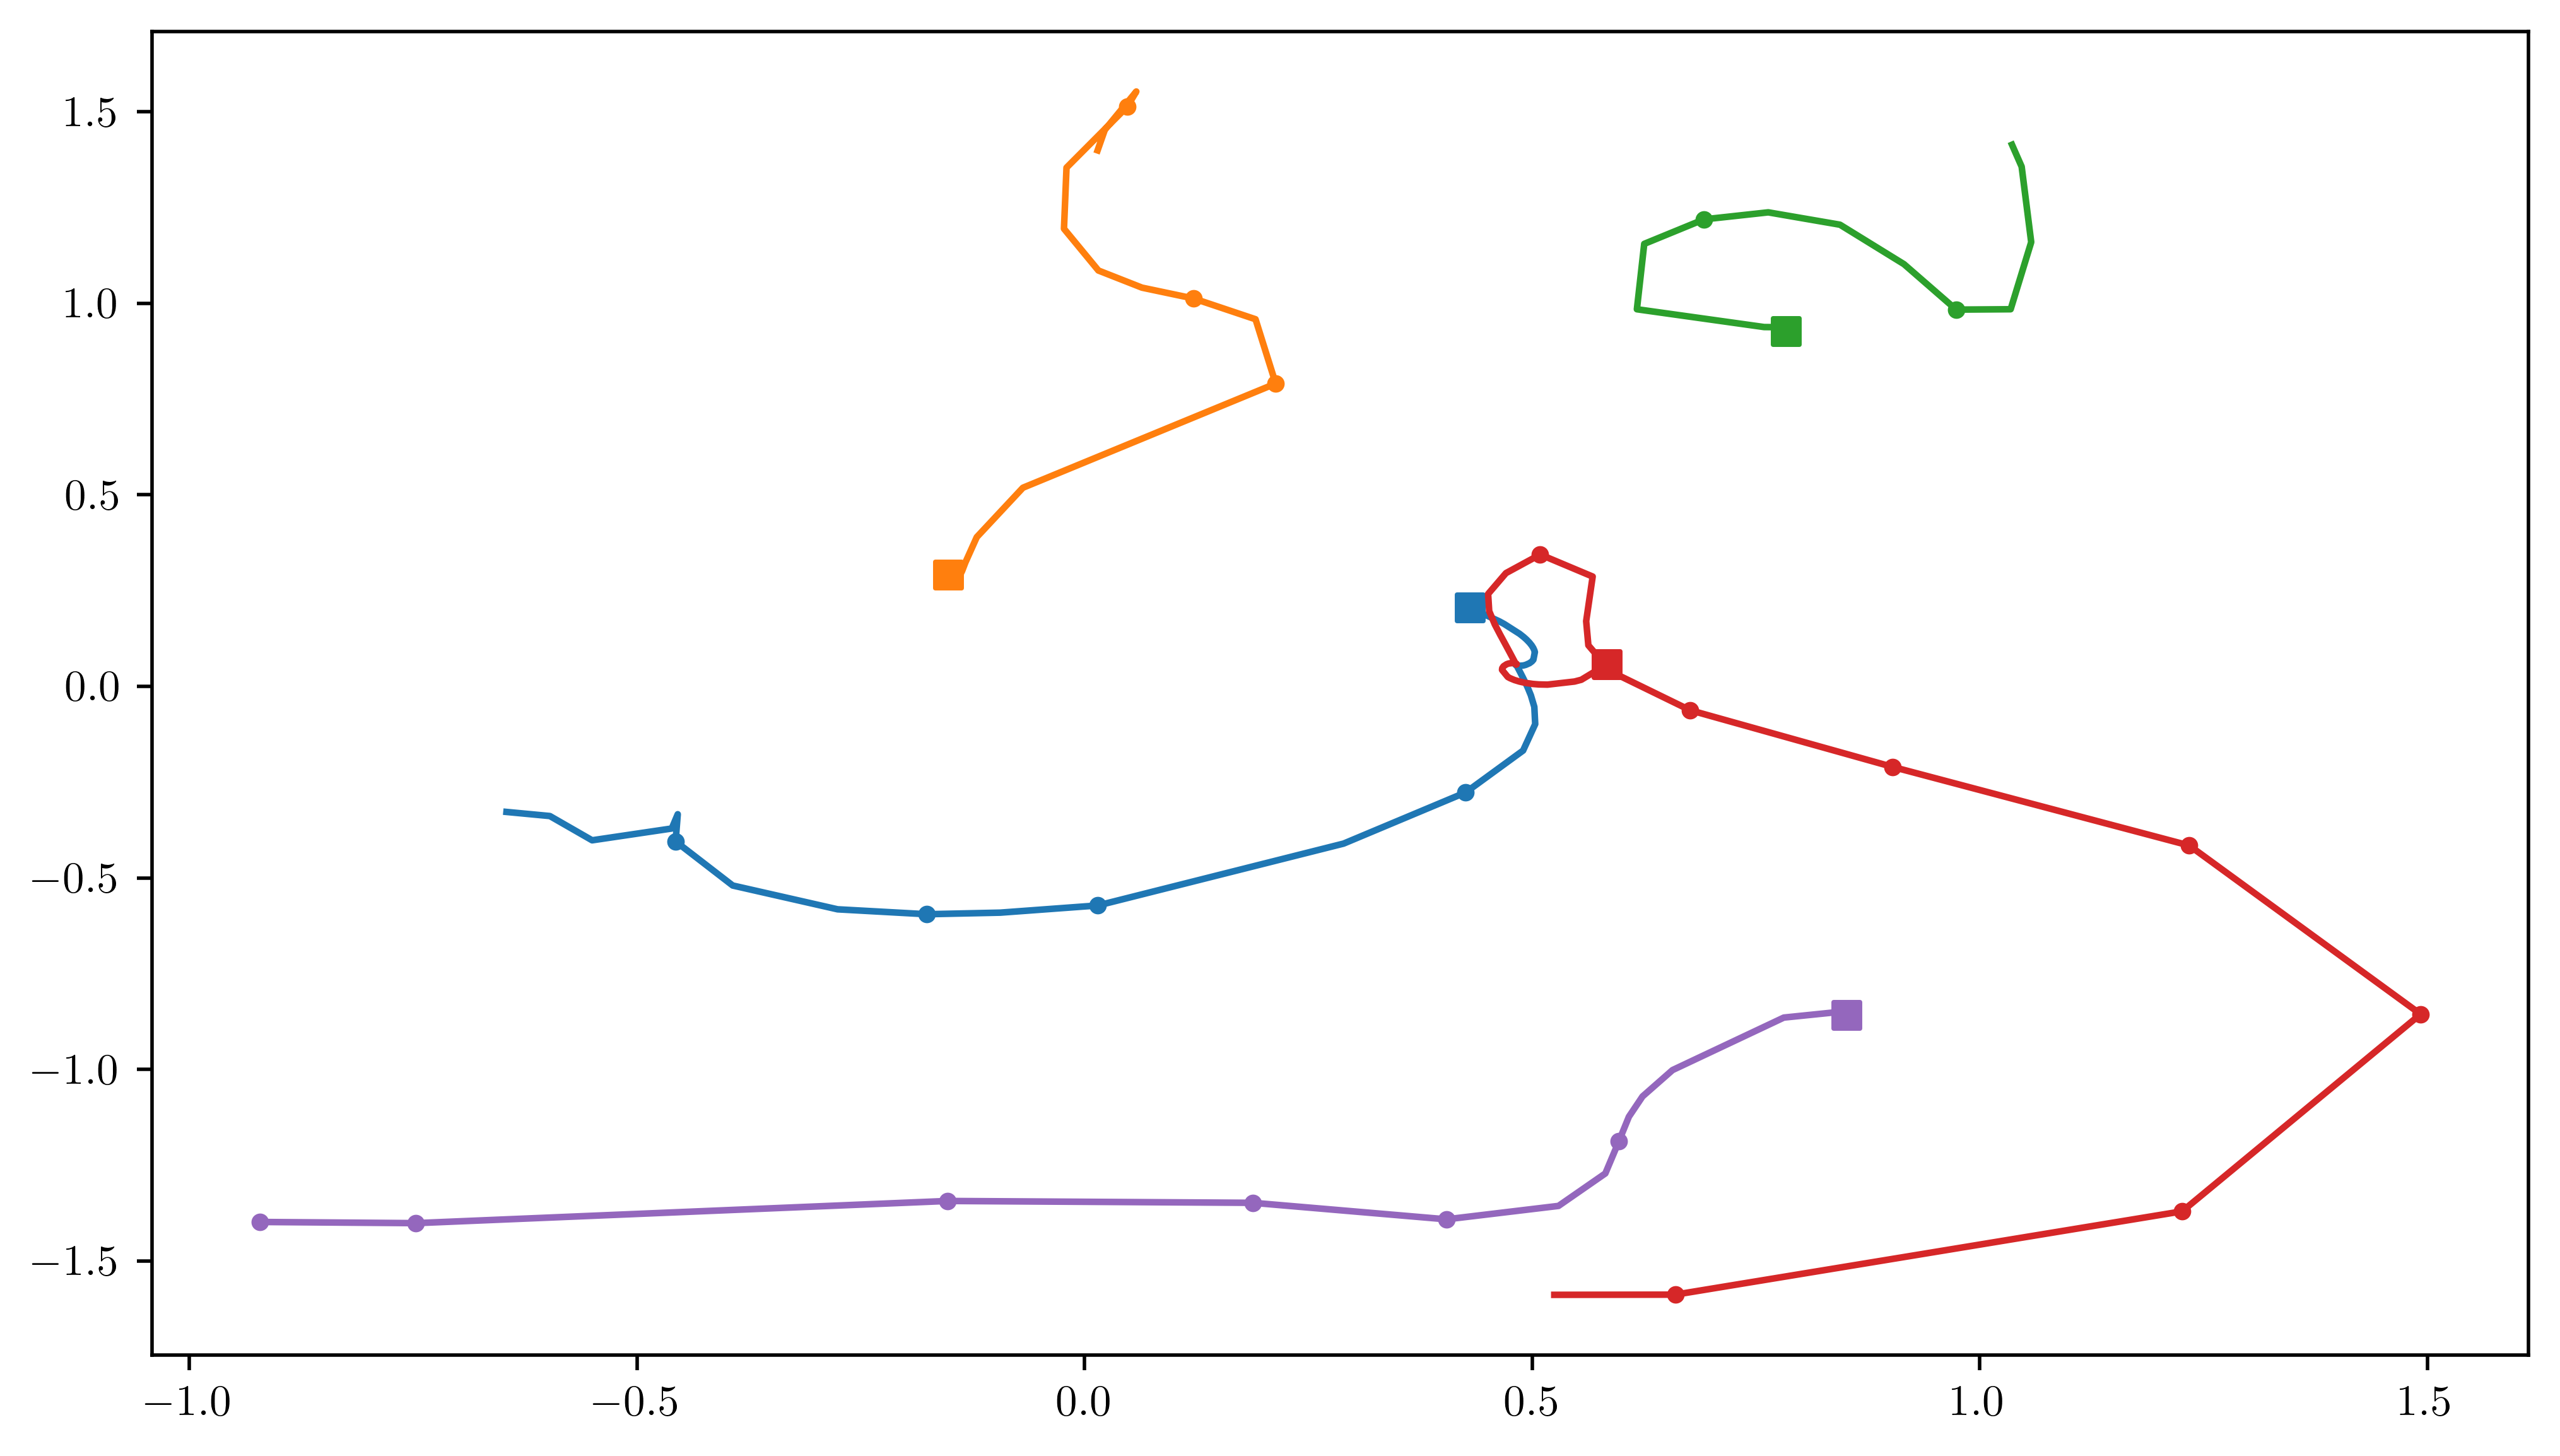

In [3]:
nptc, max_t = 5, 3
update_fun, (rtol, atol) = '5bs', (1e-3, 1e-5)
overlap_epsilon = 1e-2
un, ln, Xlim, seed = 1, 1, 1, 0
attract, align = 1, 1
calculate_fun = "do_LimFiniteDipole2D"

problem_kwargs = {
    'ini_t':           0,
    'max_t':           max_t,
    'update_fun':      update_fun,
    'update_order':    (rtol, atol),
    'eval_dt':         0.1,
    'calculate_fun':   calculate_fun_dict[calculate_fun],
    'prbHandle':       prbHandle_dict[calculate_fun],
    'rltHandle':       rltHandle_dict[calculate_fun],
    'ptcHandle':       ptcHandle_dict[calculate_fun],
    'fileHandle':      "",
    'save_every':      1,
    'nptc':            nptc,
    'overlap_epsilon': overlap_epsilon,
    'un':              un,
    'ln':              ln,
    'Xlim':            Xlim,
    'attract':         attract,
    'align':           align,
    'seed':            seed,
    'tqdm_fun':        tqdm_notebook,
}

max_t = problem_kwargs['max_t']
ini_t = problem_kwargs['ini_t']
eval_dt = problem_kwargs['eval_dt']

print(problem_kwargs)
doPrb1 = problem_kwargs['calculate_fun'](**problem_kwargs)
prb1 = doPrb1.do_calculate(ini_t=ini_t, max_t=max_t, eval_dt=eval_dt, )

################################################################################3

# %matplotlib notebook
%matplotlib inline

figsize = np.array((16, 9))*0.5
dpi = 500 if 'inline' in matplotlib.get_backend() else 100
plt_tmin = -1
nmarker = 0.1

fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
for obji, i0 in zip(prb1.obj_list, range(9)):
    color = 'C%d' % i0
    tidx = prb1.t_hist >= plt_tmin
    X_hist = obji.X_hist[tidx]
    axi.scatter(X_hist[0, 0], X_hist[0, 1], c=color, marker='s')
    axi.plot(X_hist[:, 0], X_hist[:, 1], '.-', color=color, markevery=nmarker)
# support_fun.set_axes_equal(axi)

# fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
# fig.patch.set_facecolor('white')
# for obji, i0 in zip(prb1.obj_list, range(9)):
#     color = 'C%d' % i0
#     axi.plot(prb1.t_hist, obji.phi_hist / np.pi, '.-', color=color)
